In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

import os 

In [4]:
# 데이터를 불러옵니다.
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
# modeling
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # convolution, 32개의 필터, (3x3) 필터 크기 설정
model.add(Conv2D(64, (3,3), activation='relu')) # convolution
model.add(MaxPooling2D(pool_size=(2,2))) # pooling or subsampling - method : max pooling(freq) / average pooling
model.add(Dropout(0.25)) # dropout : hidden layer의 노드 중 일부를 임의로 꺼주는 것, 정보의 25%를 끈다.
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# 모델의 실행 옵션을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
# 모델 최적화를 위한 설정 구간입니다.
MODEL_DIR = '../output/model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="../output/model/MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
# 모델을 실행합니다.
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

2022-09-05 11:31:58.331041: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-05 11:31:58.624712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-05 11:32:07.598176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 0.08193, saving model to ../output/model/MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.08193 to 0.05360, saving model to ../output/model/MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.05360 to 0.05130, saving model to ../output/model/MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.05130 to 0.04595, saving model to ../output/model/MNIST_CNN.hdf5

Epoch 5: val_loss improved from 0.04595 to 0.04168, saving model to ../output/model/MNIST_CNN.hdf5

Epoch 6: val_loss did not improve from 0.04168

Epoch 7: val_loss did not improve from 0.04168

Epoch 8: val_loss improved from 0.04168 to 0.04096, saving model to ../output/model/MNIST_CNN.hdf5

Epoch 9: val_loss improved from 0.04096 to 0.03824, saving model to ../output/model/MNIST_CNN.hdf5

Epoch 10: val_loss did not improve from 0.03824

Epoch 11: val_loss did not improve from 0.03824

Epoch 12: val_loss did not improve from 0.03824

Epoch 13: val_loss did not improve from 0.03824

Epoch 14: v

313/313 [==============================] - 3s 9ms/step


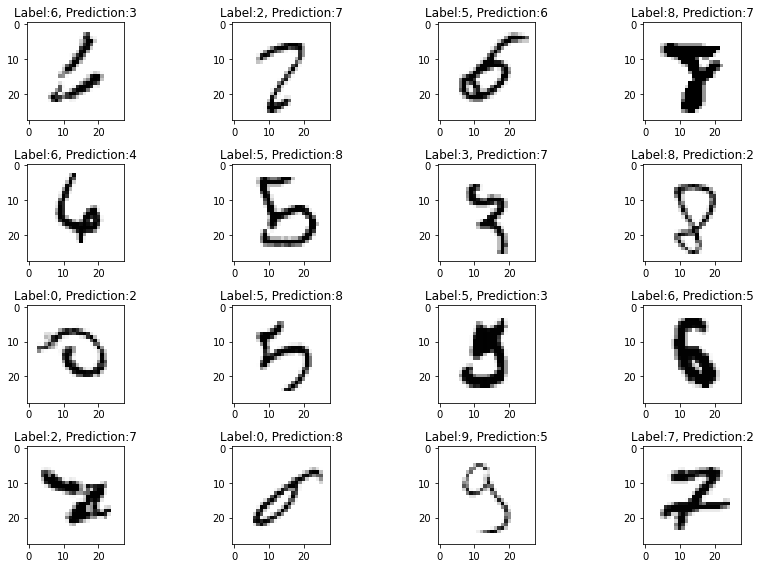

In [11]:
import random

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(y_test, axis=1)

wrong_result = []

for n in range(0, len(test_labels)):
    if predicted_labels[n] != test_labels[n]:
        wrong_result.append(n)

samples = random.choices(population=wrong_result, k=16)

count = 0
nrows = ncols = 4

plt.figure(figsize=(12,8))

for n in samples:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(X_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()